## Exploring dataset
This notebook is intended for exploring the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

## Generate image statistics

1. Read the images from the folder
2. Store the results in a CSV file
3. Read images statistics from the generated CSV file
4. Get dataset statistics
5. Plot histogram for the data in dataset
6. Check the unique sources from metadata file


In [2]:
from src.preprocessing.image_preprocessor import get_images_statistics,store_images_statistics,plot_images_statistics,get_images_edges_statistics
import pandas as pd

# Available categories in the dataset
dataset = ['COVID','NORMAL','Viral Pneumonia','Lung_Opacity']

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/COVID-19_Radiography_Dataset/'
preprocessed_data_dir = '../data/preprocessed/'

In [3]:
for i in dataset:
    metadata_df = pd.read_csv(raw_data_dir+i+'.metadata.csv')
    print(f"Found {len(metadata_df)} entries for {i}.")

Found 3616 entries for COVID.
Found 10192 entries for NORMAL.
Found 1345 entries for Viral Pneumonia.
Found 6012 entries for Lung_Opacity.


Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral Pneumonia
Processing images for: Lung_Opacity


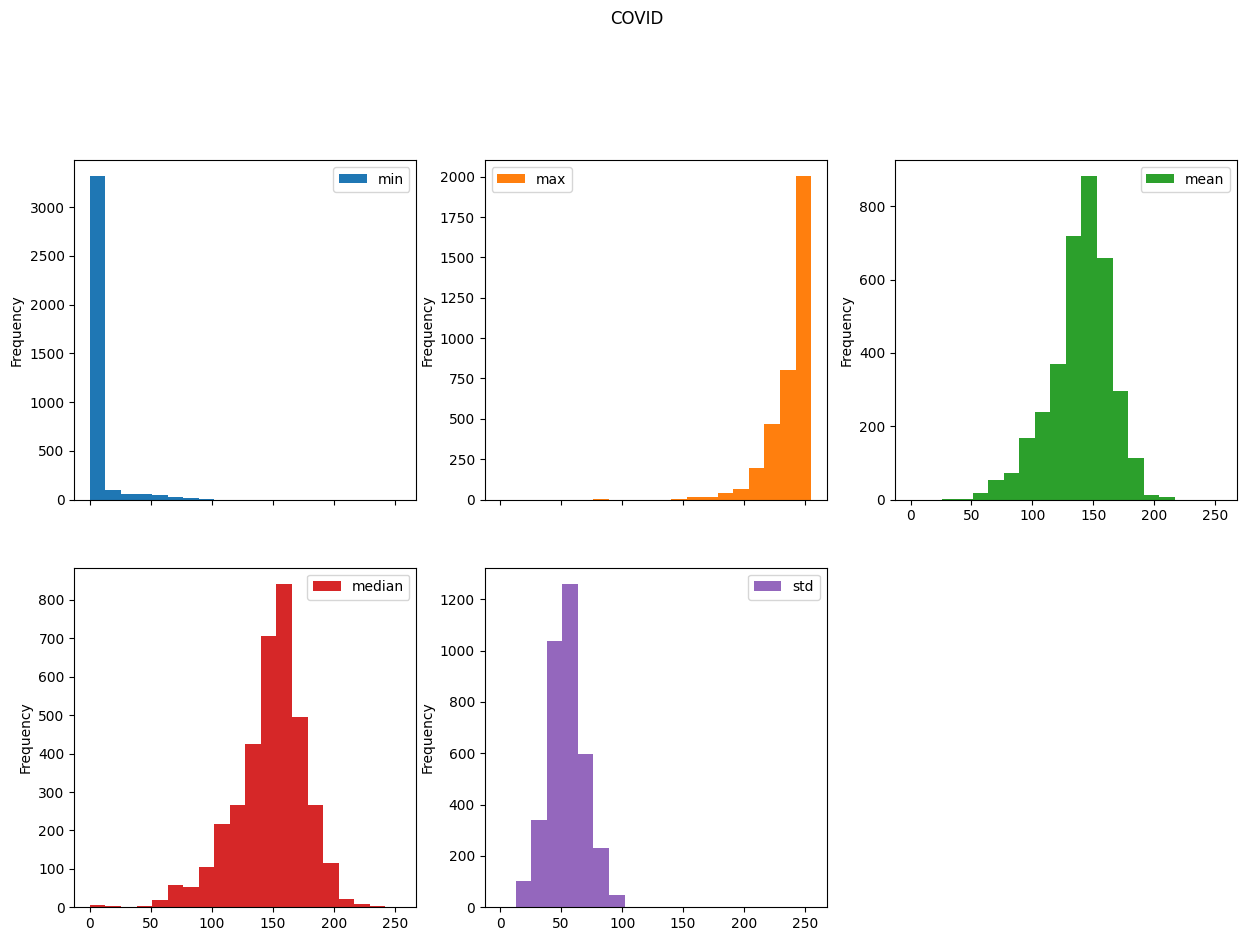

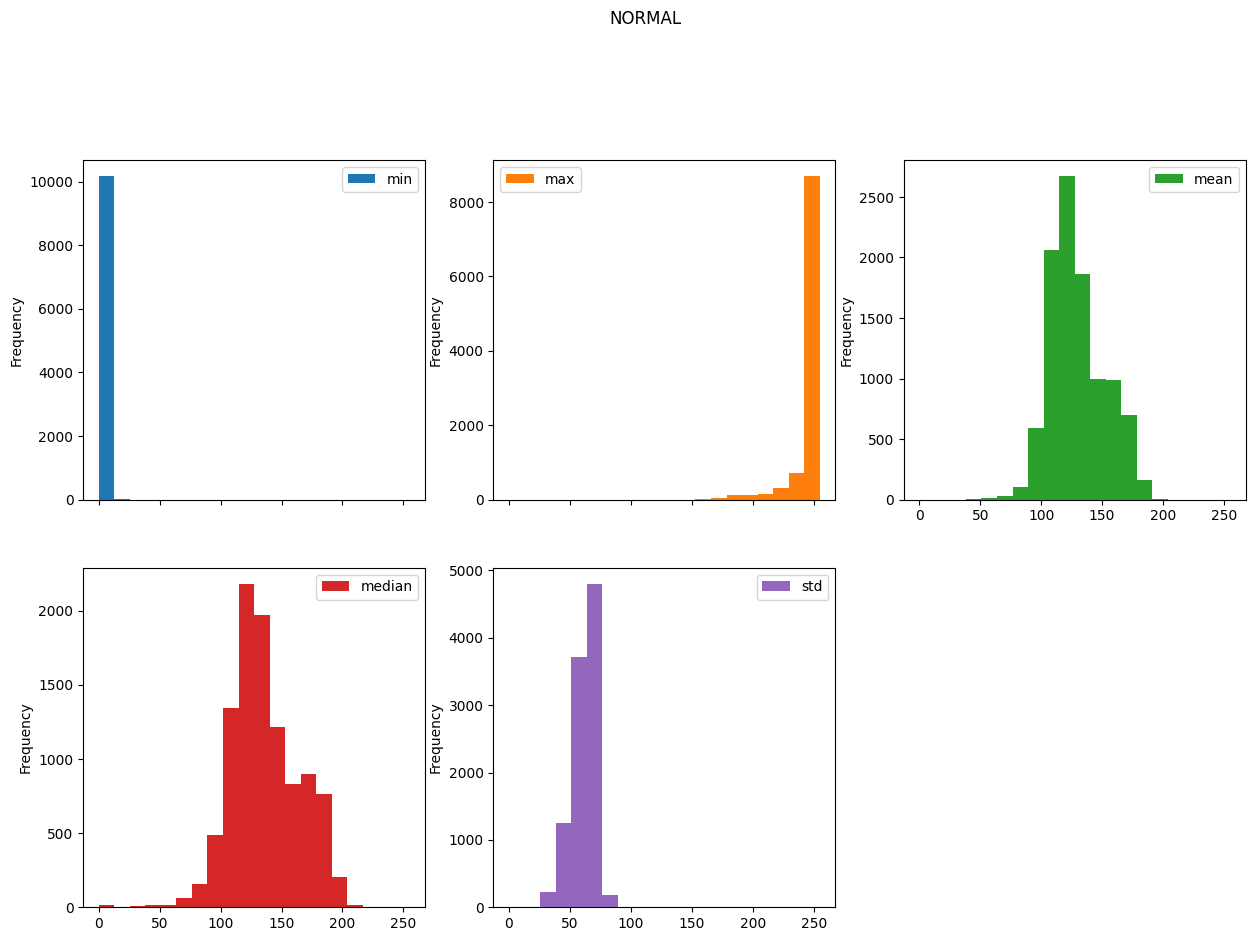

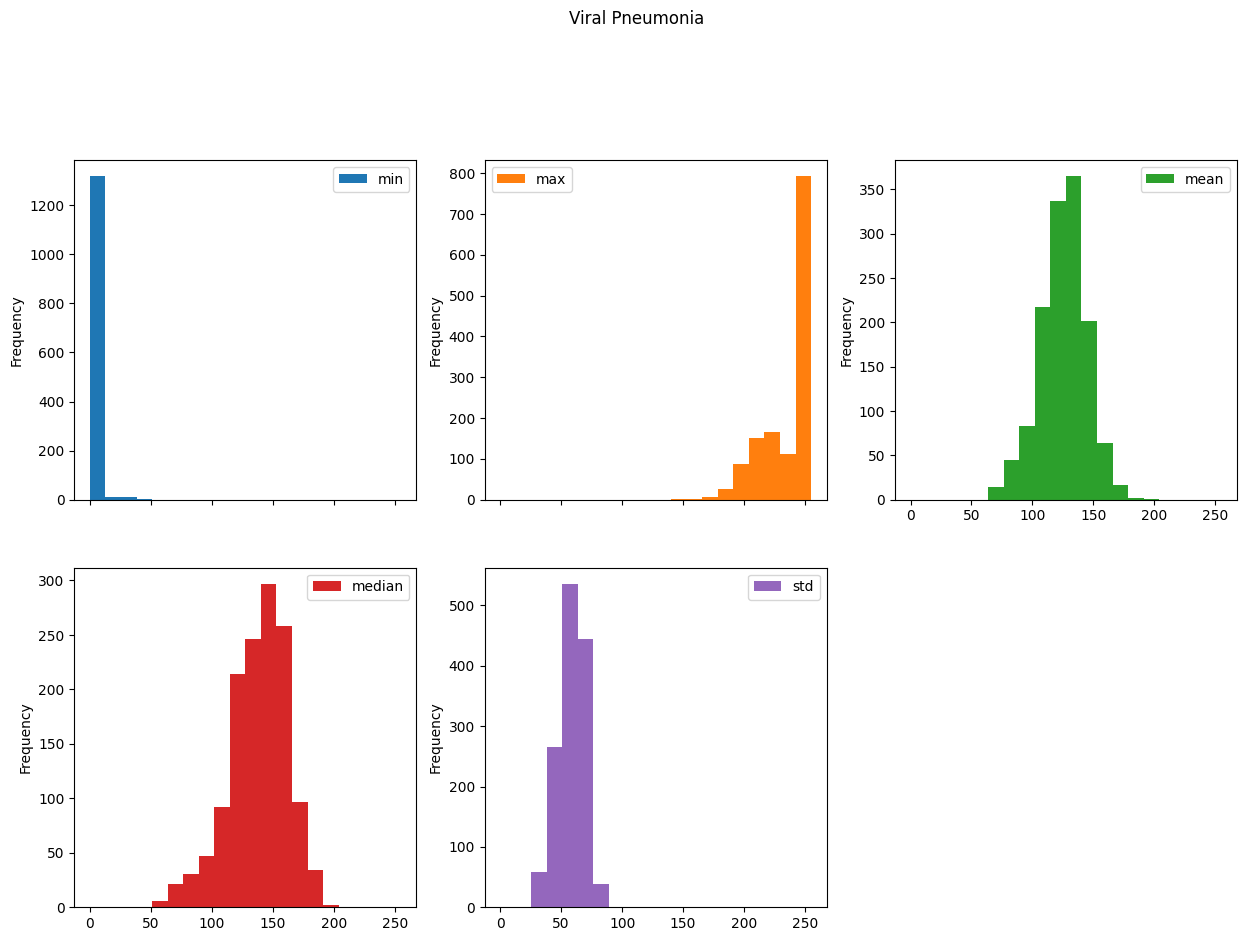

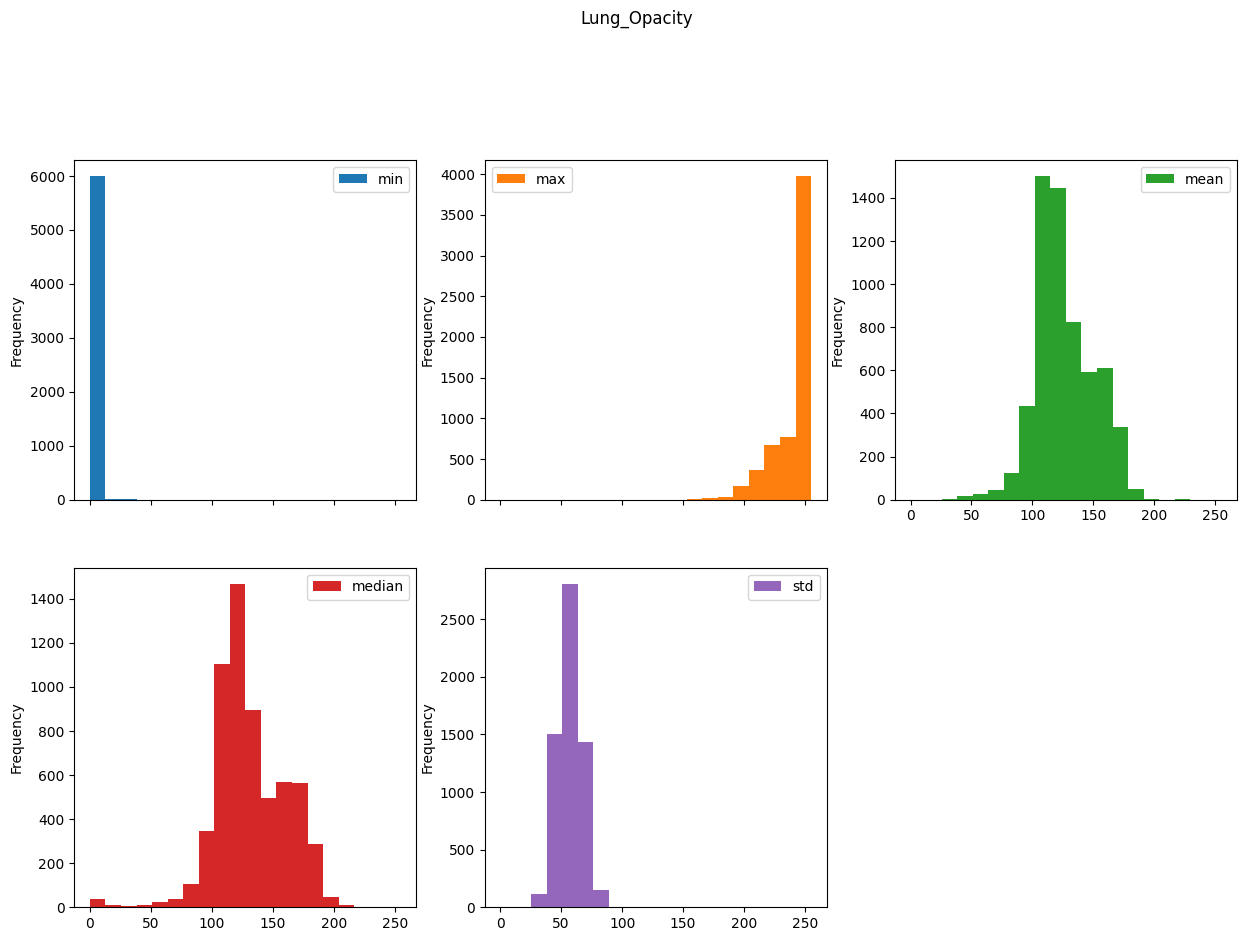

In [4]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics(raw_data_dir+i+'/images')
    plot_images_statistics(i,image_stats)
    del image_stats


## Getting statistics for cropped images

Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral Pneumonia
Processing images for: Lung_Opacity


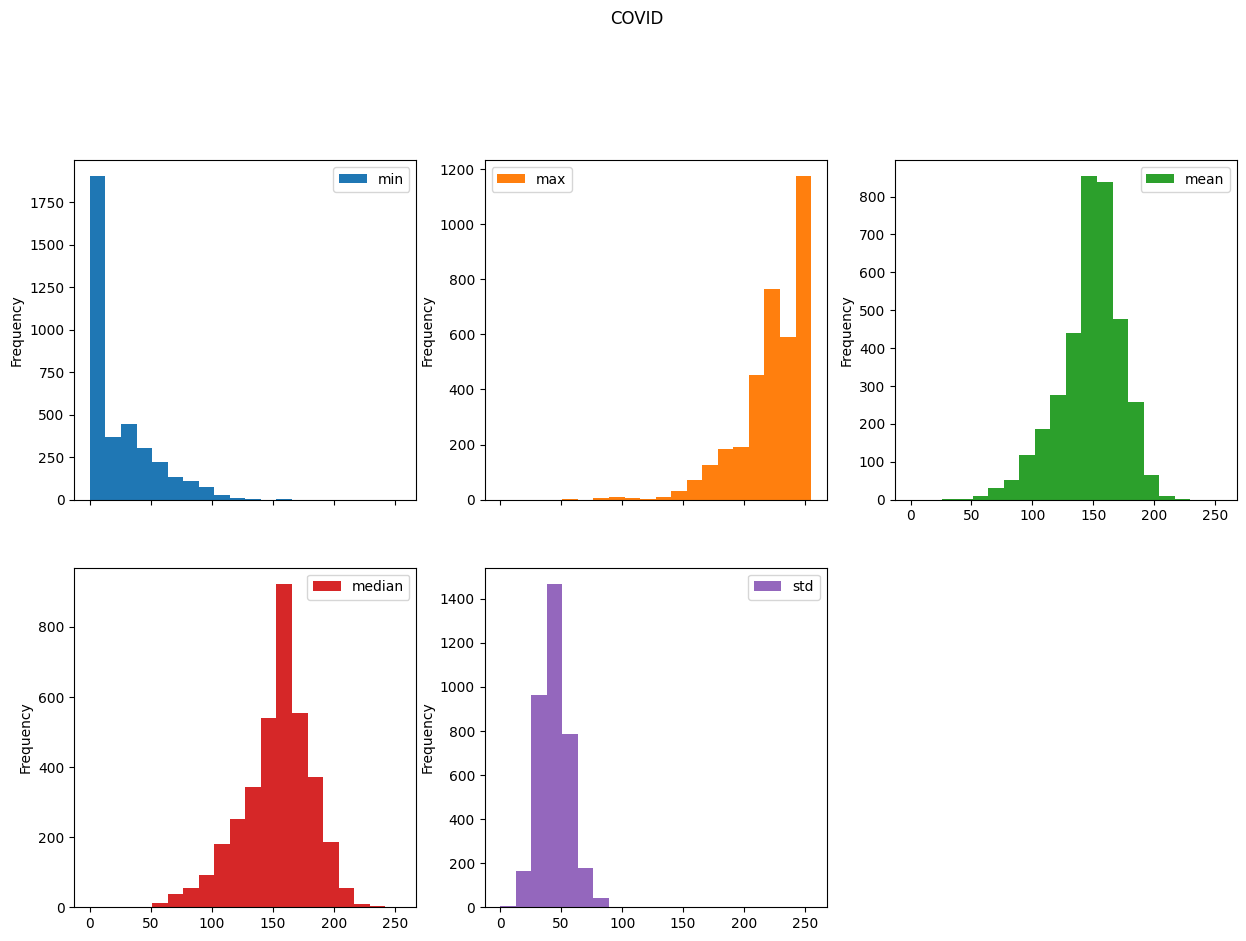

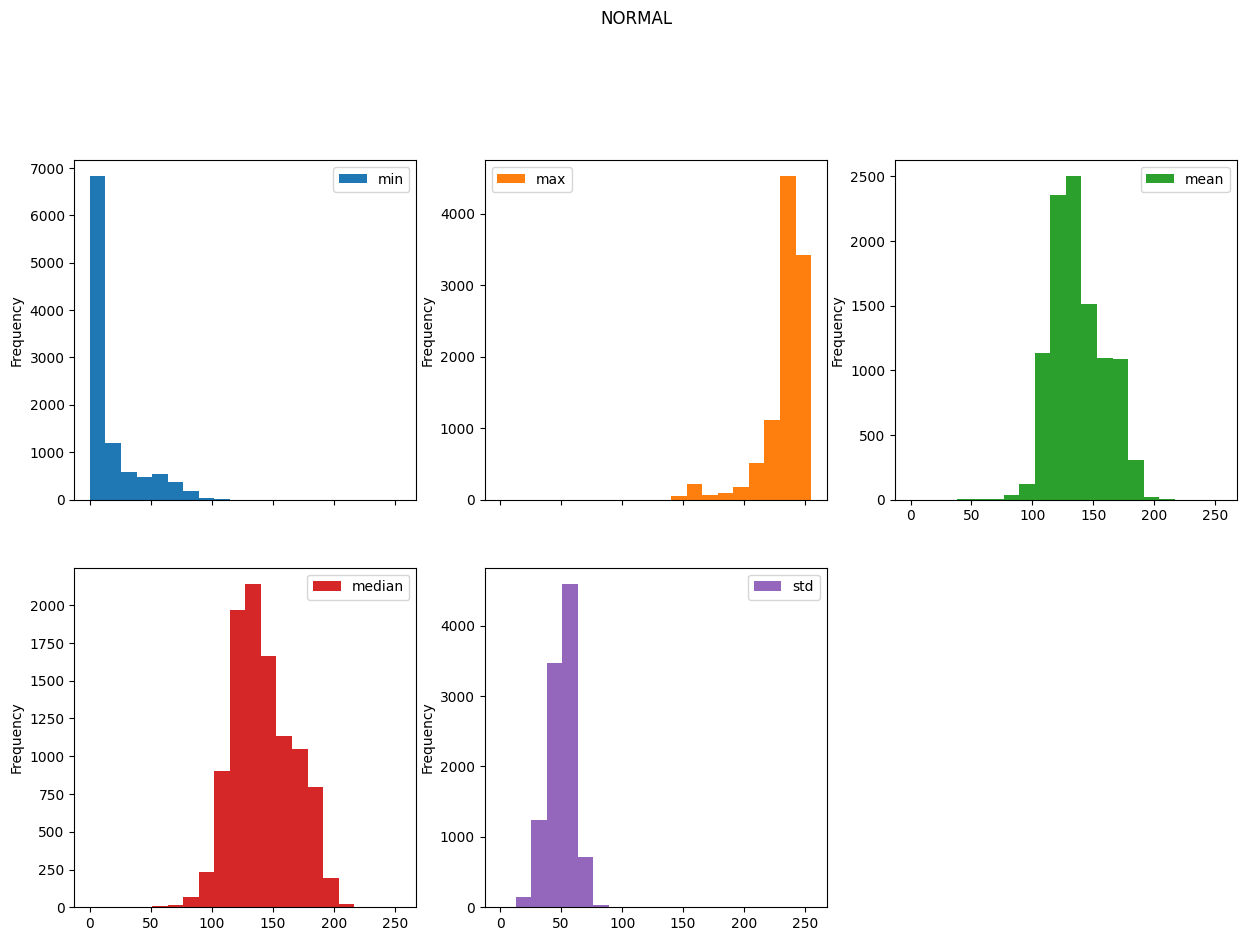

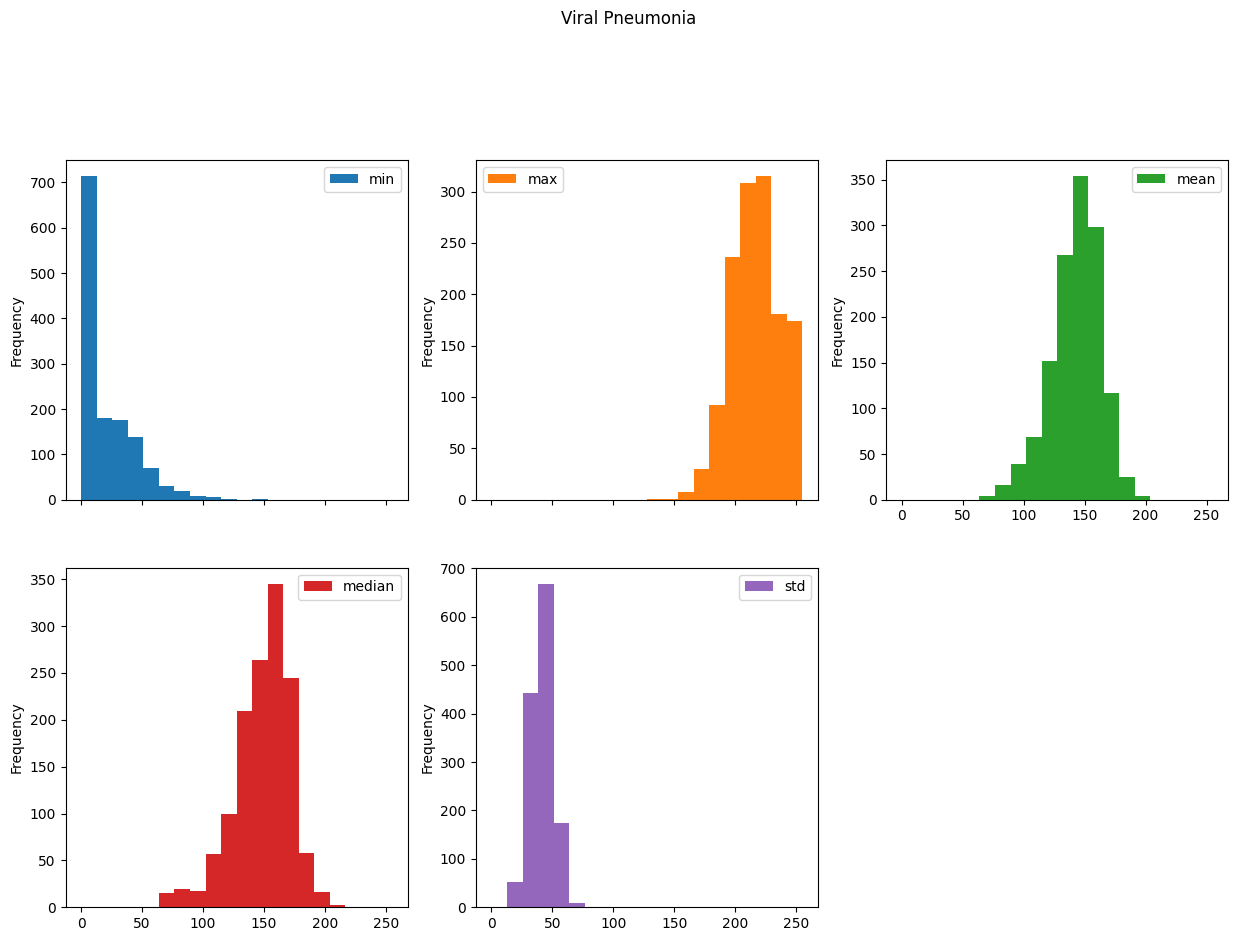

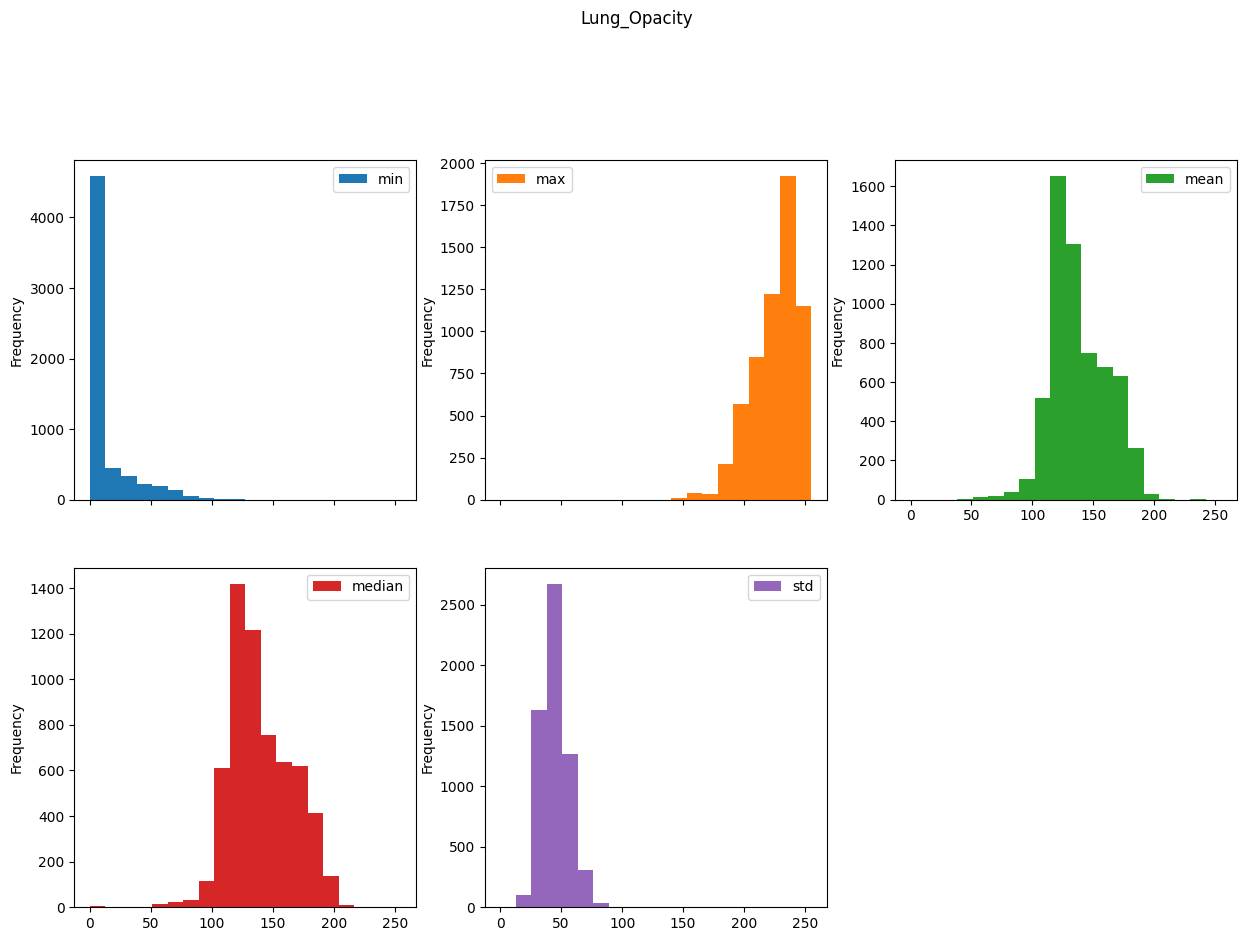

In [5]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_statistics(raw_data_dir+i+'/images',10)
    plot_images_statistics(i,image_stats)
    del image_stats

## Find dataset sources

For understanding the quality of the dataset, it is important to check the source of the dataset by checking the URLs in metadata files.

In [6]:
for i in dataset:
    stats = pd.read_csv(raw_data_dir+i.lower()+'.metadata.csv', index_col=0)
    display(i, 'Number of sources '+str(len( stats.URL.unique())),  stats.URL.unique())

'COVID'

'Number of sources 6'

array(['https://sirm.org/category/senza-categoria/covid-19/',
       'https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png',
       'https://eurorad.org', 'https://github.com/armiro/COVID-CXNet',
       'https://github.com/ieee8023/covid-chestxray-dataset',
       'https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711'],
      dtype=object)

'NORMAL'

'Number of sources 2'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data',
       'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Viral Pneumonia'

'Number of sources 1'

array(['https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

'Lung_Opacity'

'Number of sources 1'

array(['https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data'],
      dtype=object)

## Edge detecting of dataset's images

To explore the features of the images in the dataset, we can try finding the edges of the images by using Sobel (Gradient calculations).
As an example (one image):

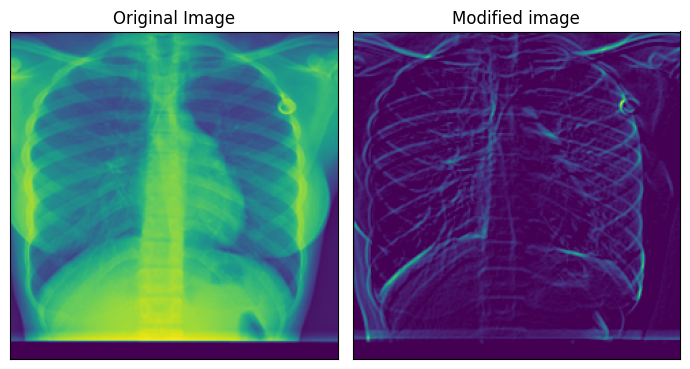

In [7]:
# Import the necessary Libraries
import cv2
from src.preprocessing.image_preprocessor import crop_image
from src.visualization.visualizer import plot_image
 
# Read image from disk.
img = crop_image(raw_data_dir+'/Normal/images/normal-1.png', 10)
#img = cv2.imread('../../COVID-19_Radiography_Dataset/COVID/images/covid-1.png')
# Convert BGR image to RGB
ddept=cv2.CV_8U

x = cv2.Sobel(img[0], ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(img[0], ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)

plot_image(img[0],edge)

Detecting the edges for all images, storing the data in csv files and then visualizing them.

Processing images for: COVID
Processing images for: NORMAL
Processing images for: Viral Pneumonia
Processing images for: Lung_Opacity


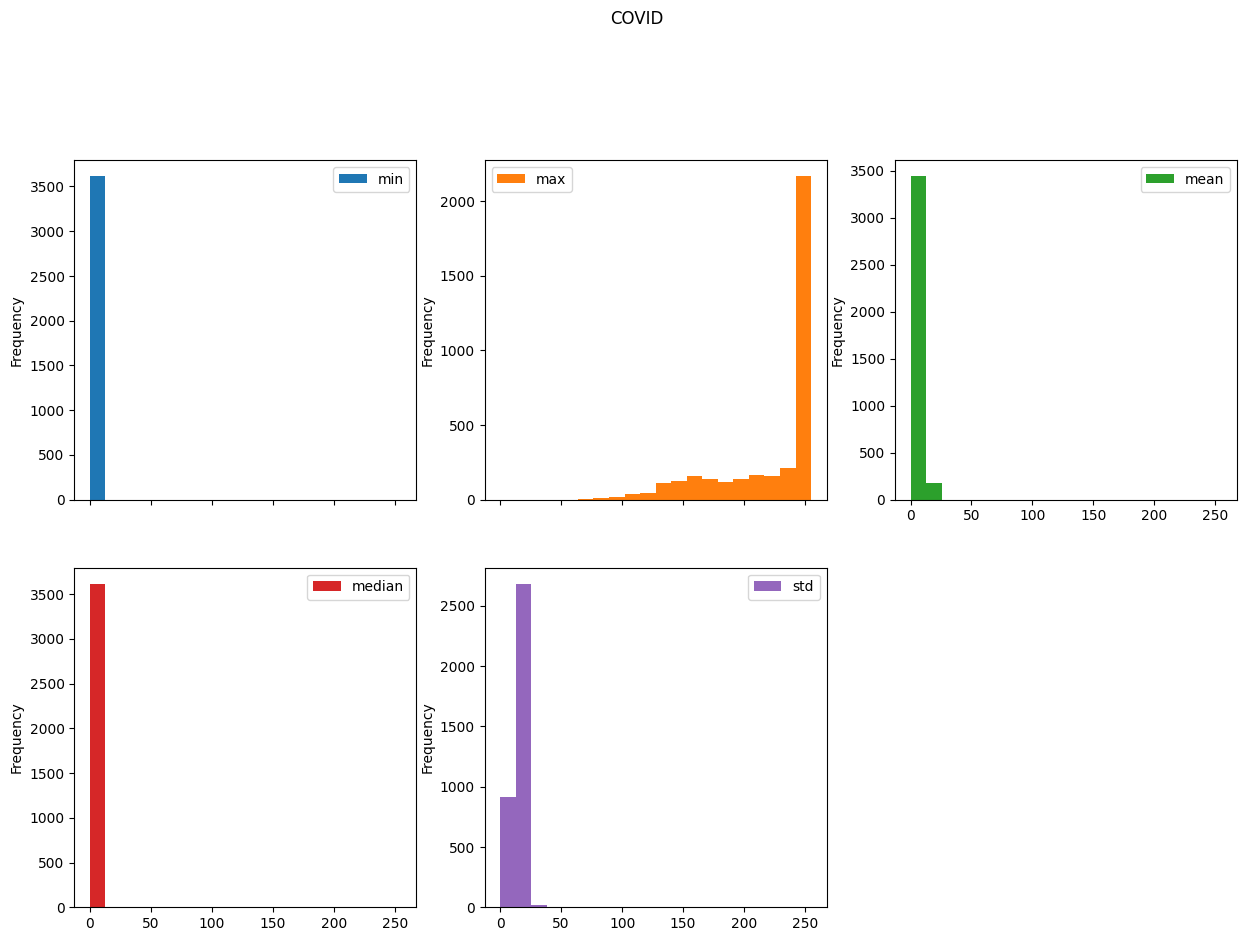

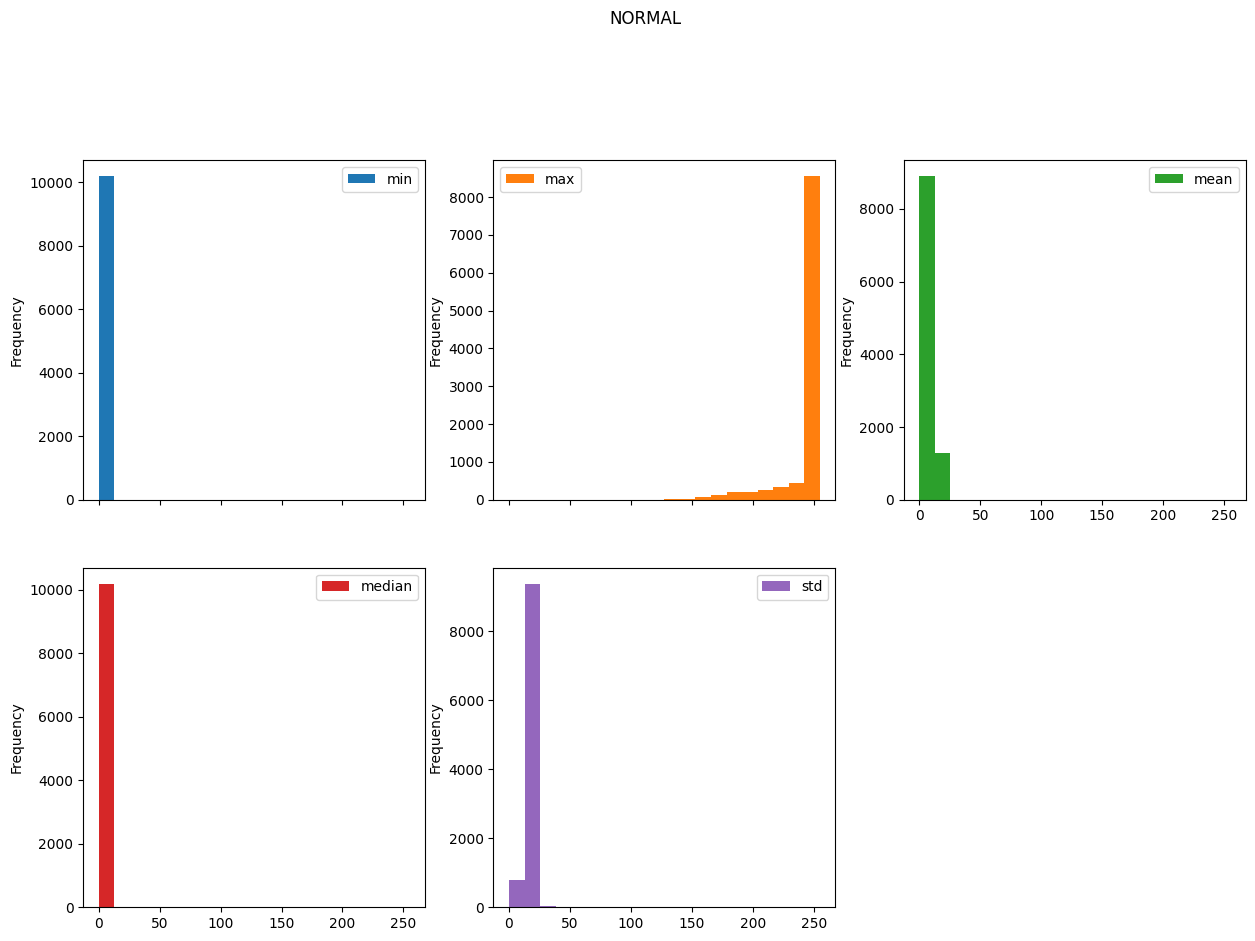

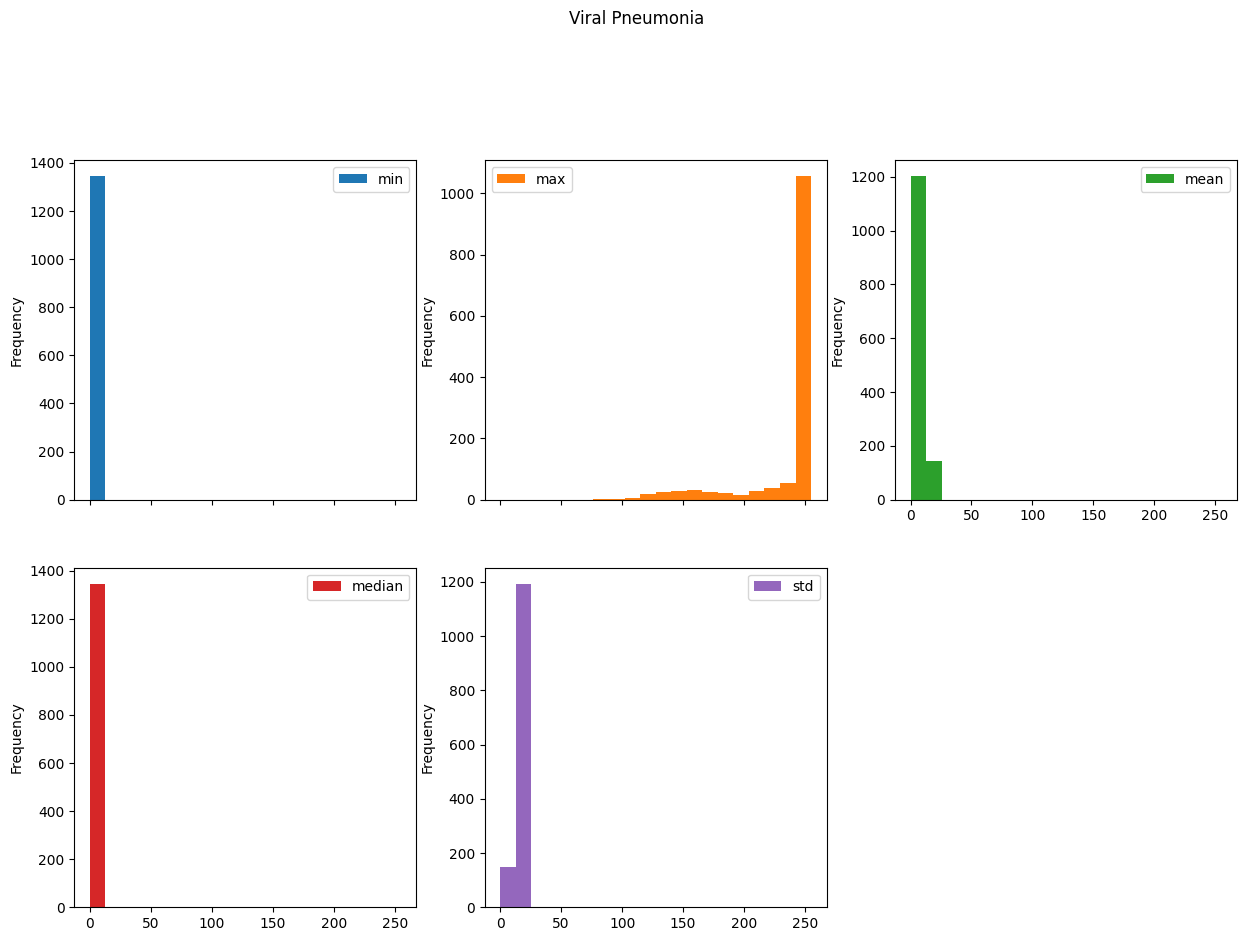

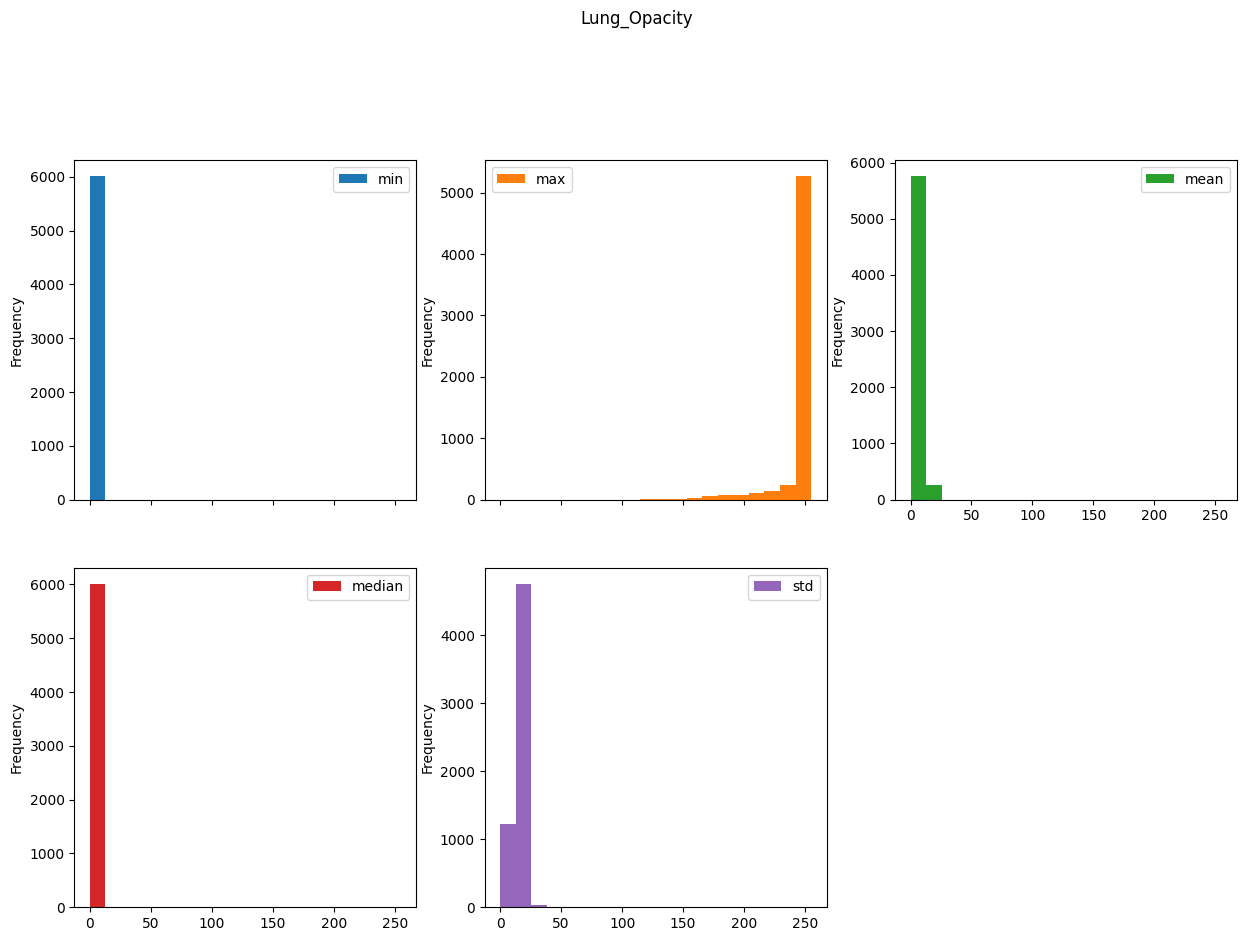

In [8]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_images_edges_statistics(raw_data_dir+i+'/images')
    plot_images_statistics(i,image_stats)
    del image_stats
